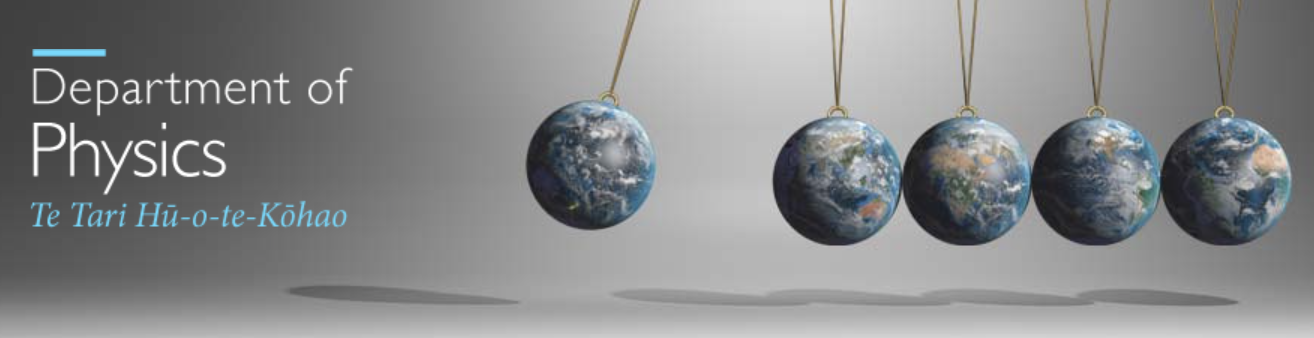

$$
\def\julia{\texttt{julia}}
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
\def\qq{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\quiz#1{\color{green}{?>\;\textrm{#1}}} 
$$

# PHSI 365: Computational Physics 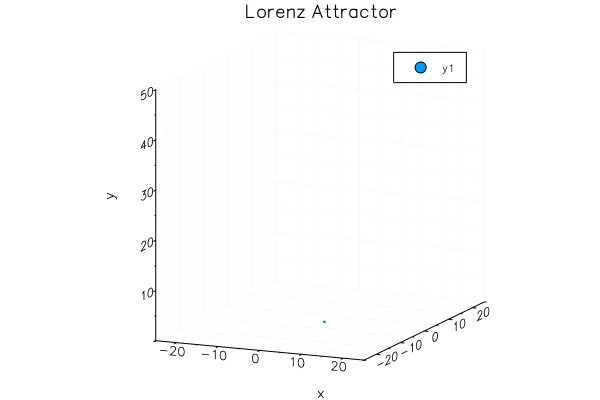

University of Otago, 2019

Dr. Ashton Bradley (Coordinator)
<br>
ashton.bradley@otago.ac.nz
<br>

_Image made with_ [Plots.jl](http://docs.juliaplots.org/latest/)

# Predator-Prey Model

A classical problem in population dynamics is the so-called predator-prey system described by the famous [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka–Volterra_equations). 

Aswell as being interesting in its own right, this system forms a wonderful testing ground for us to learn some very general techniques of numerical solution and analysis. 

## Physical System 🌈 

### Rabbits 🐇 

Consider a population of rabbits, $r(t)$, evolving in time due to forces in its environment. 

There are two important effects:

1. The reproductive growth rate $\lambda$.
2. The natural decay rate $\gamma$ due to predation by wolves. 

It is assumed that the rabbits don't live long enough to die of old age, but have population decay rate determined by the number of wolves. 

### Wolves 🐺 

The wolves on the other hand, being apex predators, are assumed to die of old age, and to have reproductive growth rate depending on the abundance of their food supply, the rabbits.

The population $w(t)$ is thus altered by two main affects: 

1. Reproductive growth rate $\kappa$
2. Natural decay rate due to old age $\beta$.

## Equations of motion 🎳 
The __Lotka-Volterra equations__ for this system take the form:
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{dr}{dt}&=\lambda r - \gamma wr\\
\frac{dw}{dt}&=-\beta w + \kappa rw
\end{align}
</font>
</div>

The solutions of this two-variable system of coupled __nonlinear__ equations tells us everything about our simple model for population dynamics.  

## Analysis 🕵️‍♀️ 
Of course, we can go ahead and numerically integrate the equations and examine the solutions. 

To do that successfully we also need to understand the physical meaning of different initial conditions.

Before we do that, we should ask:

1. Are there any regimes that we can describe analytically?
2. Are there any obvious sanity checks for our results?

The first question to answer is: what are the restrictions on the coeffecients in order that our equations describe the rabbit-wolf system? 

A brief inspection should reveal that we require $\beta, \gamma, \kappa, \lambda$ all real and positive for the equations of motion to correspond with our conceptual formulation of the model. 

$\quiz{What goes wrong with the model if $\gamma <0?$}$

The second question for any system of time-evolution equations is the role of initial conditions. What is a meaningful initial condition for our system? 

## Stationary solutions 
A very useful approach is to look for stationary solutions or fixed points of the equations of motion. 

That is, we seek *time-independent* solutions $w(t)\equiv\bar w$, $r(t)\equiv\bar r$ of the equations of motion. 

Assuming such solutions exist, when the populations reach these special values, all of the growth and decay processes altering the rabbit and wolf populations are in perfect balance. 

Such fixed-point solutions are non-trivial as our equations of motion are nonlinear.

By *definition*, the fixed-point populations $\bar r, \bar w$ are solutions of the time-independent equations under the condition that $dr/dt=dw/dt\equiv 0$, in other words, we should solve the simpler system:

\begin{align}
0&=\lambda \bar r - \gamma \bar w\bar r\notag\\
0&=-\beta \bar w + \kappa \bar r\bar w\notag
\end{align}

with solutions

<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\bar r&=\frac{\beta}{\kappa}  \\
\bar w&=\frac{\lambda}{\gamma} 
\end{align}
    </font></div>
    
This _fixed-point_ or _stationary_ solution will play a central role in undertanding all of the complicated time dynamics that can occur in the rabbit-wolf system. 

We can interpret these populations as occuring due to a competition between the primary forces acting on each population.

__Note:__ There is an interesting sign of "symbiosis" here in the steady state, namely that the steady state population for each species only depends on the gain and loss parameters for the _other_ species. The equiliubrium state is thus a property of the whole system.

# Numerical solution ⚙️ 
Let's solve the equations of motion. We could write our own integrators to do this, but at this point we are going to use this opportunity to get familiar with some existing Julia packages, and the process of using Julia. 

In [2]:
import Pkg;
Pkg.add("LinearAlgebra")
using OrdinaryDiffEq, Plots, LaTeXStrings, ParameterizedFunctions, Interact, LinearAlgebra
gr(size=(600,200),grid=false);

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1273
┌ Info: Precompiling ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
└ @ Base loading.jl:1273
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1273


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12512193102806286557\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6033615240582476462\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12512193102806286557\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
# system parameters
λ = .7   # 🐇 linear growth 
γ = 0.4  # 🐇 nonlinear loss
κ = 0.3  # 🐺 nonlinear growth
β = 1.2  # 🐺 linear loss

# 🎳 cute definition
pprey = @ode_def_all LotkaVolterra begin
  d🐇 = λ*🐇 - γ*🐺*🐇
  d🐺 = - β*🐺 + κ*🐇*🐺
end λ γ β κ

# here we declare what we want this function to depend upon parametrically
# we also need to package up all the parameters for later
params = [λ γ β κ]'

# ⚙️ definition: (doing it without ParameterizedFunctions)
# function lotkavolterra(du,u,p,t)
#     du[1] =  λ*u[1] - γ*u[2]*u[1]
#     du[2] = -β*u[2] + κ*u[1]*u[2]
# end

# If we start at a fixed point, it is really fixed?
r̄ = β/κ
w̄ = λ/γ
u0 = [r̄ ; w̄]
ti = 0.0
tf = .2
Nt = 100
tspan = (ti,tf)
t = LinRange(ti,tf,Nt)
alg = Tsit5()

# define the problem type
prob = ODEProblem(pprey,u0,tspan,params)

# solve the problem, saving at specified time points
@time sol = solve(prob,alg=alg,saveat=t);

 10.507777 seconds (20.41 M allocations: 1006.940 MiB, 7.55% gc time)


In [4]:
# second call is a true timing (without compilation)
@time sol = solve(prob,alg=alg,saveat=t);

  0.000295 seconds (196 allocations: 31.070 KiB)


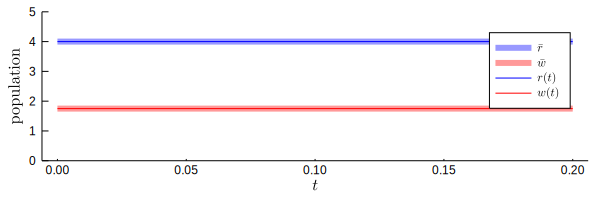

In [5]:
#pull out the data
🐇 = sol[1,:]; 🐺 = sol[2,:]

#plot the solution and compare with steady state
plot(t,r̄*one.(t),c=:blue,lw=6,alpha=0.4,label=L"\bar r")
plot!(t,w̄*one.(t),c=:red,lw=6,alpha=0.4,label=L"\bar w")
plot!(t,🐇,c=:blue,label=L"r(t)");plot!(t,🐺,c=:red,label=L"w(t)")
xlabel!(L"t");ylabel!(L"\textrm{population}") 
ylims!(0.,5.)

In the steady state, the wolves and rabbits live in perfect equilibrium (harmony would not be the right word here!): 👶 + 💀 = 0

Hereafter I am going to be "less cute" and stick to __r__ and __w__ for rabbits and wolves respectively. 

## Small perturbations

$\quiz{What happens if the rabbits and wolves start near, but not exactly at, a fixed point (steady state)?}$

In [6]:
ϵ = .1

u0 = [β/κ + ϵ ; λ/γ - ϵ] # more rabbits, less wolves, than equilibrium
ti = 0.0
tf = 50.0
Nt = 200
tspan = (ti,tf)
t = LinRange(ti,tf,Nt)

prob = ODEProblem(pprey,u0,tspan,params)
@time sol = solve(prob,alg=alg,saveat=t);

# Pull the time evolution out of the ODE solver
r = sol[1,:]; w = sol[2,:];

  0.000319 seconds (297 allocations: 55.523 KiB)


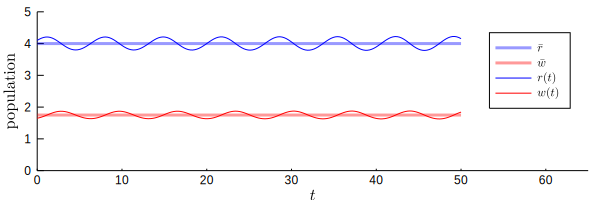

In [7]:
#plot the solution and compare with steady state
plot(t,r̄*one.(t),c=:blue,lw=3,alpha=0.4,label=L"\bar r")
plot!(t,w̄*one.(t),c=:red,lw=3,alpha=0.4,label=L"\bar w")
plot!(t,r,c=:blue,label=L"r(t)");plot!(t,w,c=:red,label=L"w(t)")
xlabel!(L"t");ylabel!(L"\textrm{population}") 
ylims!(0., 5.)
xlims!(0.,65)

__Notice:__ They are out of phase (i.e. not in opposite phase), one leads the other by 1/4 cycle.

# Analytic solution: linearisation 🕵️‍♀️ 
We can expand upon this notion of steady states further and linearise the Lotka-Volterra system around the steady-steady state. 

We can discover the properties of small excursions from the steady state. 

The procedure is very general, and this kind of analysis can reveal fundamental properties of equations of motion. 

The essential assumption is that we consider __small departures__ from the steady state. It is then perfectly legitimate to linearise the equations of motion, by which we mean simply that we should only retain terms that are at most linear in the amplitude of the departure. 

In mathematical terms, we can write a general solution in the form (fixed point stability can also be formulated in terms of the [Jacobian matrix](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) of the fixed point):

<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
r(t)&=\bar r+\epsilon(t) \\
w(t)&=\bar w+\delta(t) 
\end{align}
    </font>
    </div>
    
where our barred variables describe the steady state solution, and hence are *by definition* **independent of time**. Recall that the steady state solutions satisfy the fixed point equations. The **linearisation** appears when we insist that $\epsilon, \delta$ must be small, and we then make use of this property to neglect **nonlinear** terms, namely any terms of order $\epsilon^2, \delta^2, \epsilon\delta$, or indeed any higher powers. 

Now that we have written the solution in suitable form, we substitute into the equations of motion to give
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{d\epsilon}{dt}&=\lambda (\bar r+\epsilon) - \gamma (\bar w+\delta)(\bar r+\epsilon)\\
\frac{d\delta}{dt}&=-\beta (\bar w+\delta) + \kappa (\bar w+\delta)(\bar r+\epsilon)
\end{align}
</font>
</div>

Linearising, and using the fixed point equations, we find
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{d\epsilon}{dt}&=- \gamma \bar r\delta\\
\frac{d\delta}{dt}&= \kappa \bar w\epsilon 
\end{align}
</font>
</div>

A common theme in these kinds of calculations: ___There is a lot of fortuitous cancellation!___

These simple coupled equations can now be solved using a standard trick. 

We notice that the $\dot\epsilon$ equation only couples to $\delta$, and $\dot\delta$ only couples ot $\epsilon$. 

If we differentiate again with respect to time, we find that the equations decouple nicely:
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{d^2\epsilon}{dt^2}&=- \gamma \kappa\bar r\bar w\epsilon=-\omega^2\epsilon,\\
\frac{d^2\delta}{dt^2}&= -\gamma \kappa\bar r\bar w\epsilon=-\omega^2\delta 
\end{align}
</font>
</div>

and both equations describe simple harmonic (oscillatory) motion.

We can identify a __characteristic frequency of oscillation__ 

<div class="alert alert-block alert-warning">
<font color=blue>
$$\omega\equiv\sqrt{\gamma \kappa\bar r\bar w}.$$
</font>
</div>

Notice that linearisation has revealed quite a lot about the dynamics of our system. We learn that there are steady states, and there a **characteristic frequency** of oscillation around the steady-state, and the frequency increases with the size of the steady state populations, and coupling rates. 

So the linearised dynamics are of the form (putting $\epsilon(0)=\epsilon_0$ etc)

\begin{align}
\epsilon(t)&=\epsilon_0\cos\omega t-\frac{\gamma\bar r\delta_0}{\omega}\sin\omega t,\\
\delta(t)&= \delta_0\cos\omega t+\frac{\kappa \bar w\epsilon_0}{\omega}\sin\omega t,
\end{align}

where we have included the intial phase (the $\sin$ terms), by making use of the initial state. If you are not convinced, you should check carefully that this is the solution of the linearised equations.

We should emphasise that these oscillations can be understood as a kind of __linear phenomenon__, but they are occuring in a __nonlinear system__ - the stationary solution is nonlinear! 

# Failure of linearisation 🌈 

Most interesting physics systems are ___nonlinear___. 

Let us plot our linearised solution and check that it describes the physical system. 

With the linearised solution in hand, we can now explore something very important numerically: when does linearisation break down?

# Interact 🤚 
It can be extremely helpful to interact with our results in a rather direct way, which is pheasible for small systems like the current one.

Julia has excellent capabilities for interaction in the package `Interact`. 

We can take our code from above and define a parameter that we want to vary, and have Julia calculate all the results and analysis on the fly. To set this up we will also see our first example of a new code construct: the *macro* denoted by `@macro_name`. Macros are convenient meta-commands, i.e. code that writes code.

___Julia style guide:___ wrap hard-working code in a function, and call it. 
    You can _easily_ iterate on the function definition to debug and improve.
    
___Lab note:___ before you submit, be sure to run your lab notebook "from the top" after restarting the kernel - you will trap errors, and your marker will thank you)

In [8]:
function predatorprey(ϵ)
# parameters
λ = .7  # rabbit growth
γ = 0.4  # rabbit loss
κ = 0.3  # wolf growth
β = 1.2  # wolf loss
params = [λ γ β κ]'
    
# what happens if the rabbits and wolves start near, but not exactly at, a fixed point?
# ϵ = .1
u0 = [β/κ + ϵ ; λ/γ - ϵ] #one slightly larger, one slightly smaller
ti = 0.0
tf = 50.0
Nt = 200
tspan = (ti,tf)
t = LinRange(ti,tf,Nt)

prob = ODEProblem(pprey,u0,tspan,params)
sol = solve(prob,alg=alg,saveat=t);

# pull the time evolution out of the ODE solver
r = sol[1,:]; w = sol[2,:];
    return r, w
end

predatorprey (generic function with 1 method)

In [9]:
ϵmax = 1.6
Neps = 20
es = LinRange(0.0,ϵmax,Neps)

@manipulate for ϵ in es
    r,w = predatorprey(ϵ)
    plot(t,r̄*one.(t),c=:blue,lw=6,alpha=0.3,label=L"\bar r")
    plot!(t,w̄*one.(t),c=:red,lw=6,alpha=0.3,label=L"\bar w")
    plot!(t,r,c=:blue,label=L"r(t)");plot!(t,w,c=:red,label=L"w(t)")
    xlabel!(L"t");ylabel!(L"\textrm{population}") 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ϵ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/naveenmathew/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/naveenmathew/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/naveenmathew/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/naveenmathew/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/naveenmathew/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013b812890, Task (runnable) @0x000000013b812890), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.0842105\",\"0.168421\",\"0.252632\",\"0.336842\",\"0.421053\",\"0.505263\",\"0.589474\",\"0.673684\",\"0.757895\",\"0.842105\",\"0.926316\",\"1.01053\",\"1.09474\",\"1.17895\",\"1.26316\",\"1.34737\",\"1

What if we now decide we want to explore more than one parameter? 
We can define a new function with the same name and more arguments (we can extend our function endlessly like this, defining new versions for different numbers of arguments):

In [10]:
function predatorprey(ϵ,κ)
# parameters
λ = .7  # rabbit growth
γ = 0.4  # rabbit loss
# κ = 0.3  # wolf growth 
β = 1.2  # wolf loss
params = [λ γ β κ]'
    
#what happens if the rabbits and wolves start near, but not exactly at, a fixed point?
#ϵ = .1
u0 = [β/κ + ϵ ; λ/γ - ϵ] #one slightly larger, one slightly smaller
ti = 0.0
tf = 50.0
Nt = 200
tspan = (ti,tf)
t = LinRange(ti,tf,Nt)

prob = ODEProblem(pprey,u0,tspan,params)
sol = solve(prob,alg=alg,saveat=t)
 
#pull the time evolution out of the ODE solver
r = sol[1,:]; w = sol[2,:]
    return r, w
end

predatorprey (generic function with 2 methods)

In [11]:
#check that it runs without error
r,w = predatorprey(.1,.1)

([12.099999999999998, 12.218650244930023, 12.327218322165637, 12.419680493481819, 12.490625254861474, 12.535577236105537, 12.551504750594434, 12.537041470698371, 12.49262173254645, 12.420683881334341  …  11.99167302938708, 12.127499671903946, 12.259060320827535, 12.378389454417688, 12.478237942837405, 12.55362713201751, 12.599469470262715, 12.612589297524005, 12.591757463008172, 12.537691325177807], [1.6499999999999997, 1.6566425151398139, 1.6680879087447689, 1.6838806805062263, 1.7033317290912324, 1.725533440589771, 1.7493726660914797, 1.7735717035448493, 1.7967682633967508, 1.8176048221722214  …  1.6373384656174015, 1.6399846594893797, 1.648190718200727, 1.6615970041171046, 1.6796122028238194, 1.7015109075861057, 1.7263454136384275, 1.7529366968208902, 1.7798747929489118, 1.805518797813221])

In [12]:
#let's also get steady states for different paramters
function steadystates(λ,γ,κ,β)
    return β/κ,λ/γ
end

steadystates (generic function with 1 method)

In [13]:
ϵmax = 1.6
Neps = 20
es = LinRange(0.0,ϵmax,Neps)
ks = LinRange(0.1,3,10)

@manipulate for ϵ in es, κ in ks
    r̄,w̄ = steadystates(λ,γ,κ,β)
    r,w = predatorprey(ϵ,κ)
    plot(t,r̄*one.(t),c=:blue,lw=6,alpha=0.3,label=L"\bar r")
    plot!(t,w̄*one.(t),c=:red,lw=6,alpha=0.3,label=L"\bar w")
    plot!(t,r,c=:blue,label=L"r(t)");plot!(t,w,c=:red,label=L"w(t)")
    xlabel!(L"t");ylabel!(L"\textrm{population}") 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ϵ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/naveenmathew/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/naveenmathew/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/naveenmathew/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/naveenmathew/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/naveenmathew/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013ed79450, Task (runnable) @0x000000013ed79450), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.0842105\",\"0.168421\",\"0.252632\",\"0.336842\",\"0.421053\",\"0.505263\",\"0.589474\",\"0.673684\",\"0.757895\",\"0.842105\",\"0.926316\",\"1.01053\",\"1.09474\",\"1.17895\",\"1.26316\",\"1.34737\",\"1

# Next time
## Systems of coupled ODEs
- Coupled oscillators
- Reduction of second order systems to first order
- Driving and damping
- Mechanical resonance